Anastasiia Leskiv

# Business Understanding

Everyday in our life we are buying different products, we have a huge selection under one category. It's always hard to decide what brand or type of the product to choose. Here where reviews help us to make that dessision.Customers who have already purchased a product share their experiences by providing ratings and detailed reviews.I analyzed the reviews provided by customers. I used machine learning and deep learning models to create a predictive model. Those models will determine whether customers are satisfied or dissatisfied with the product based on their reviews. My model would help  manufacturers to make their 
products better  by incorporating customer feedback and suggestions.


# Data Understanding

This dataset containing Amazon Product Data includes product categories and various metadata. The product with the most comments in the electronics category has user ratings and comments.
## Tools
##### Numpy & Pandas for data processing
##### Scattertext for finding distinguishing terms
##### Steamlit for Classification app deployment
##### Matplotlib, WordCloud for visualization
##### Scikit-learn for machine learning
##### NLTK for natural language processing 


Unnamed - Index

reviewerName - User Name

overall - Product Rating

eviewText - Evaluation Summary

reviewTime - Evaluation Time {RAW}

day_diff - Number of days since assessment

helpful_yes - The number of times the evaluation was found useful

helpful_no - Number of people who didn't support the comment and didn't find it helpful

total_vote - Number of votes given to the evaluation

score_pos_neg_diff - score poz-neg

score_average_rating

wilson_lower_bound

## Data Preparation

#### Importing the libraries

In [1]:
# import important modules
import numpy as np
import pandas as pd

# sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    plot_confusion_matrix,
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# text preprocessing modules
from string import punctuation 

# text preprocessing modules
from nltk.tokenize import word_tokenize

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression

import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)
from sklearn.decomposition import NMF

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns

from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline



/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Exploratory Data Analysis

First of all I will read my CSV file 

In [2]:
reviews = pd.read_csv ('amazon_reviews.csv')
reviews.head()

Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                   0   

   score_average_rating  wilson_lower_bound  
0                   0.0                 0.0  
1                   0.0                 0.0  
2                   0.0                 0.0  
3                   0.0                 0.0  
4                   0.0                 0.0

In [3]:
#Checking my data
reviews.shape

(4915, 12)

We have 12 columns and 4915 rows in our dataset

In [4]:
reviews.dtypes

Unnamed: 0                int64
reviewerName             object
overall                 float64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object

Next I will check null values

In [5]:
#Checking null values
reviews.isnull().sum()

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

Here we can see that we got null values in reviewer name  and review text. I decided to drop it because I don't think the reviewer name adds any value to this project and there is only one null value in the review text which would not make a big difference. 

In [6]:
# Drop rows with null values in specified columns
df = reviews.dropna(subset=['reviewText','reviewerName'])

# Display the cleaned DataFrame
print(df)

      Unnamed: 0  reviewerName  overall  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
5              5       2Cents!      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5     It's mini storage.  It doesn't do anything els...  2013-04-29       588 

In [7]:
#Drop unnecessary columns 
df.drop(columns=['score_average_rating', 'wilson_lower_bound', 'score_pos_neg_diff'], inplace=True)
df

Unnamed: 0  reviewerName  overall  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
5              5       2Cents!      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5     It's mini storage.  It doesn't do anything els...  2013-04-29       588   
...                                                 ...         ...       ...   
4910  I bought this Sandisk 16GB Class 10 to use wit...  2013-07-23       503   
4911  Used this for extending the capabilities of my...  2013-08-22       473   
4912  Great card that is very fast and reliable. It ...  2014-03-31       252   
4913  Good amount of space for the stuff I want to d...  2013-09-16       448   
4914  I've heard bad things about this 64gb Micro SD...  2014-02-01       310   

      helpful_yes  helpful_no  total_vote  
1               0           0           0  
2               0           0           0  
3               0           0           0  
4               0           0           0  
5               0           0           0  
...           ...         ...         ...  
4910            0           0           0  
4911            0           0           0  
4912            0           0           0  
4913            0           0           0  
4914            0           0           0  

[4913 rows x 9 columns]

Next, I'll check value of each score

In [8]:
#Checking null values
df.isnull().sum()

Unnamed: 0      0
reviewerName    0
overall         0
reviewText      0
reviewTime      0
day_diff        0
helpful_yes     0
helpful_no      0
total_vote      0
dtype: int64

In [9]:
#checking value of each score
df['overall'].value_counts()


5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

Here we can see how many reviews in each score. I want to make a graph for better understanding

In [10]:
import plotly.offline as py

In [11]:
value = df['overall'].value_counts().head()
trace = go.Bar(
    y=value.index[::-1],
    x=value.values[::-1],
    orientation = 'h',
    marker=dict(
        color=value.values[::-1],
        colorscale = 'Greens',
        reversescale = True
    ),
)

layout = dict(
    title='Ratings',
    )
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Ratings")

<AxesSubplot:>

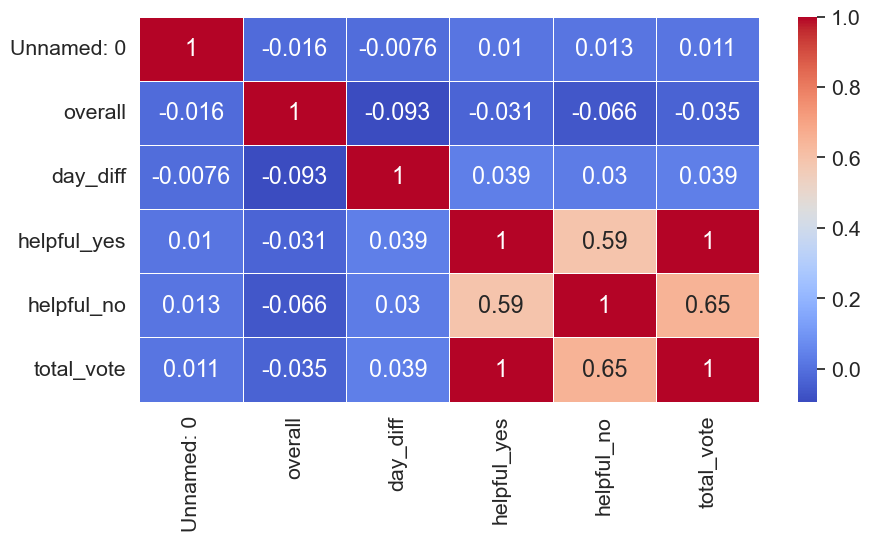

In [12]:
#ploting correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

Total vote and Helpful yes and no  have extremely high correlation.

#### Now I want to make 3 groups of raining scores "negative", "good", and "positive". 
#### Score under 3 is negative, 3 is good, above 3 is positive. 

In [13]:
def f(row):
    
    if row['overall'] == 3.0:
        val = 'Good'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [14]:
# creating new column 
df['Product_Rating'] = df.apply(f, axis=1)
df.head()


Unnamed: 0  reviewerName  overall  \
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   
5           5       2Cents!      5.0   

                                          reviewText  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5  It's mini storage.  It doesn't do anything els...  2013-04-29       588   

   helpful_yes  helpful_no  total_vote Product_Rating  
1            0           0           0       Positive  
2            0           0           0       Positive  
3            0           0           0       Positive  
4            0           0           0       Positive  
5            0           0           0       Positive

In [15]:
#checking value of each score
df['Product_Rating'].value_counts()

Positive    4447
Negative     324
Good         142
Name: Product_Rating, dtype: int64

We can see that mostly we have positive reviews on this dataset 

I was getting error message "ModuleNotFoundError: No module named 'wordcloud'" indicates that the Python interpreter is unable to find a module named 'wordcloud.' This typically means that the module is not installed in my Python environment.
To resolve this issue, I installed the 'wordcloud' module using a package manager like pip. 

In [16]:
!pip install wordcloud

Now, I'm ready to check the words that people have used the most in their reviews

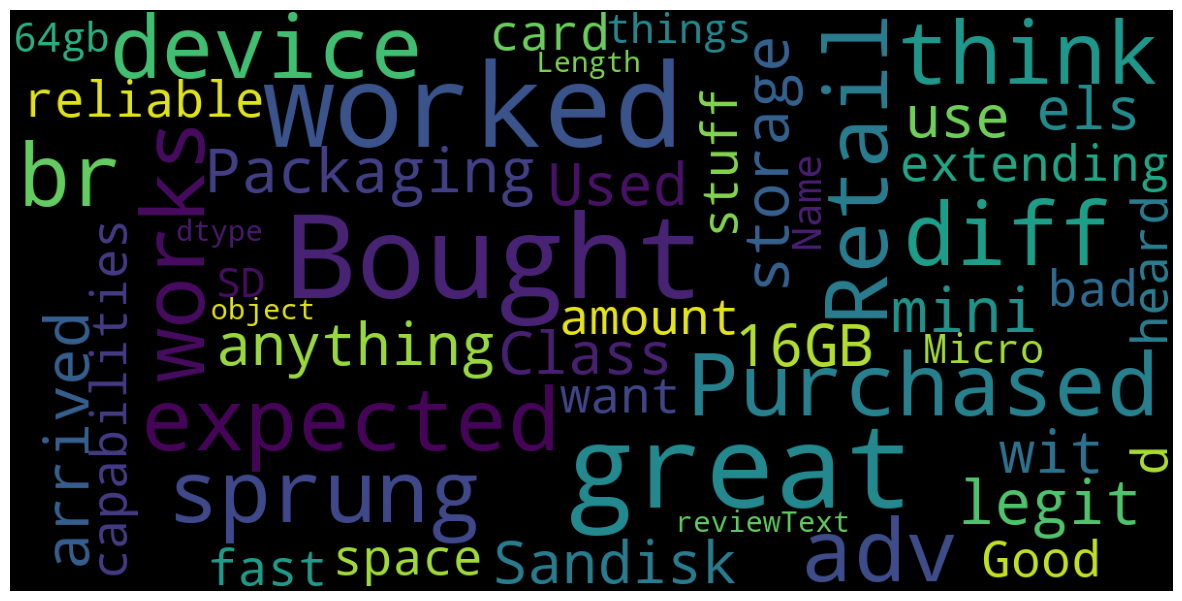

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviewText'])

Ok, here we see the most used words in our data set. It is hard to see if it is a good or bad review, so I want to check the most used words in each category.

Let's check what are the most common words in positive reviews 

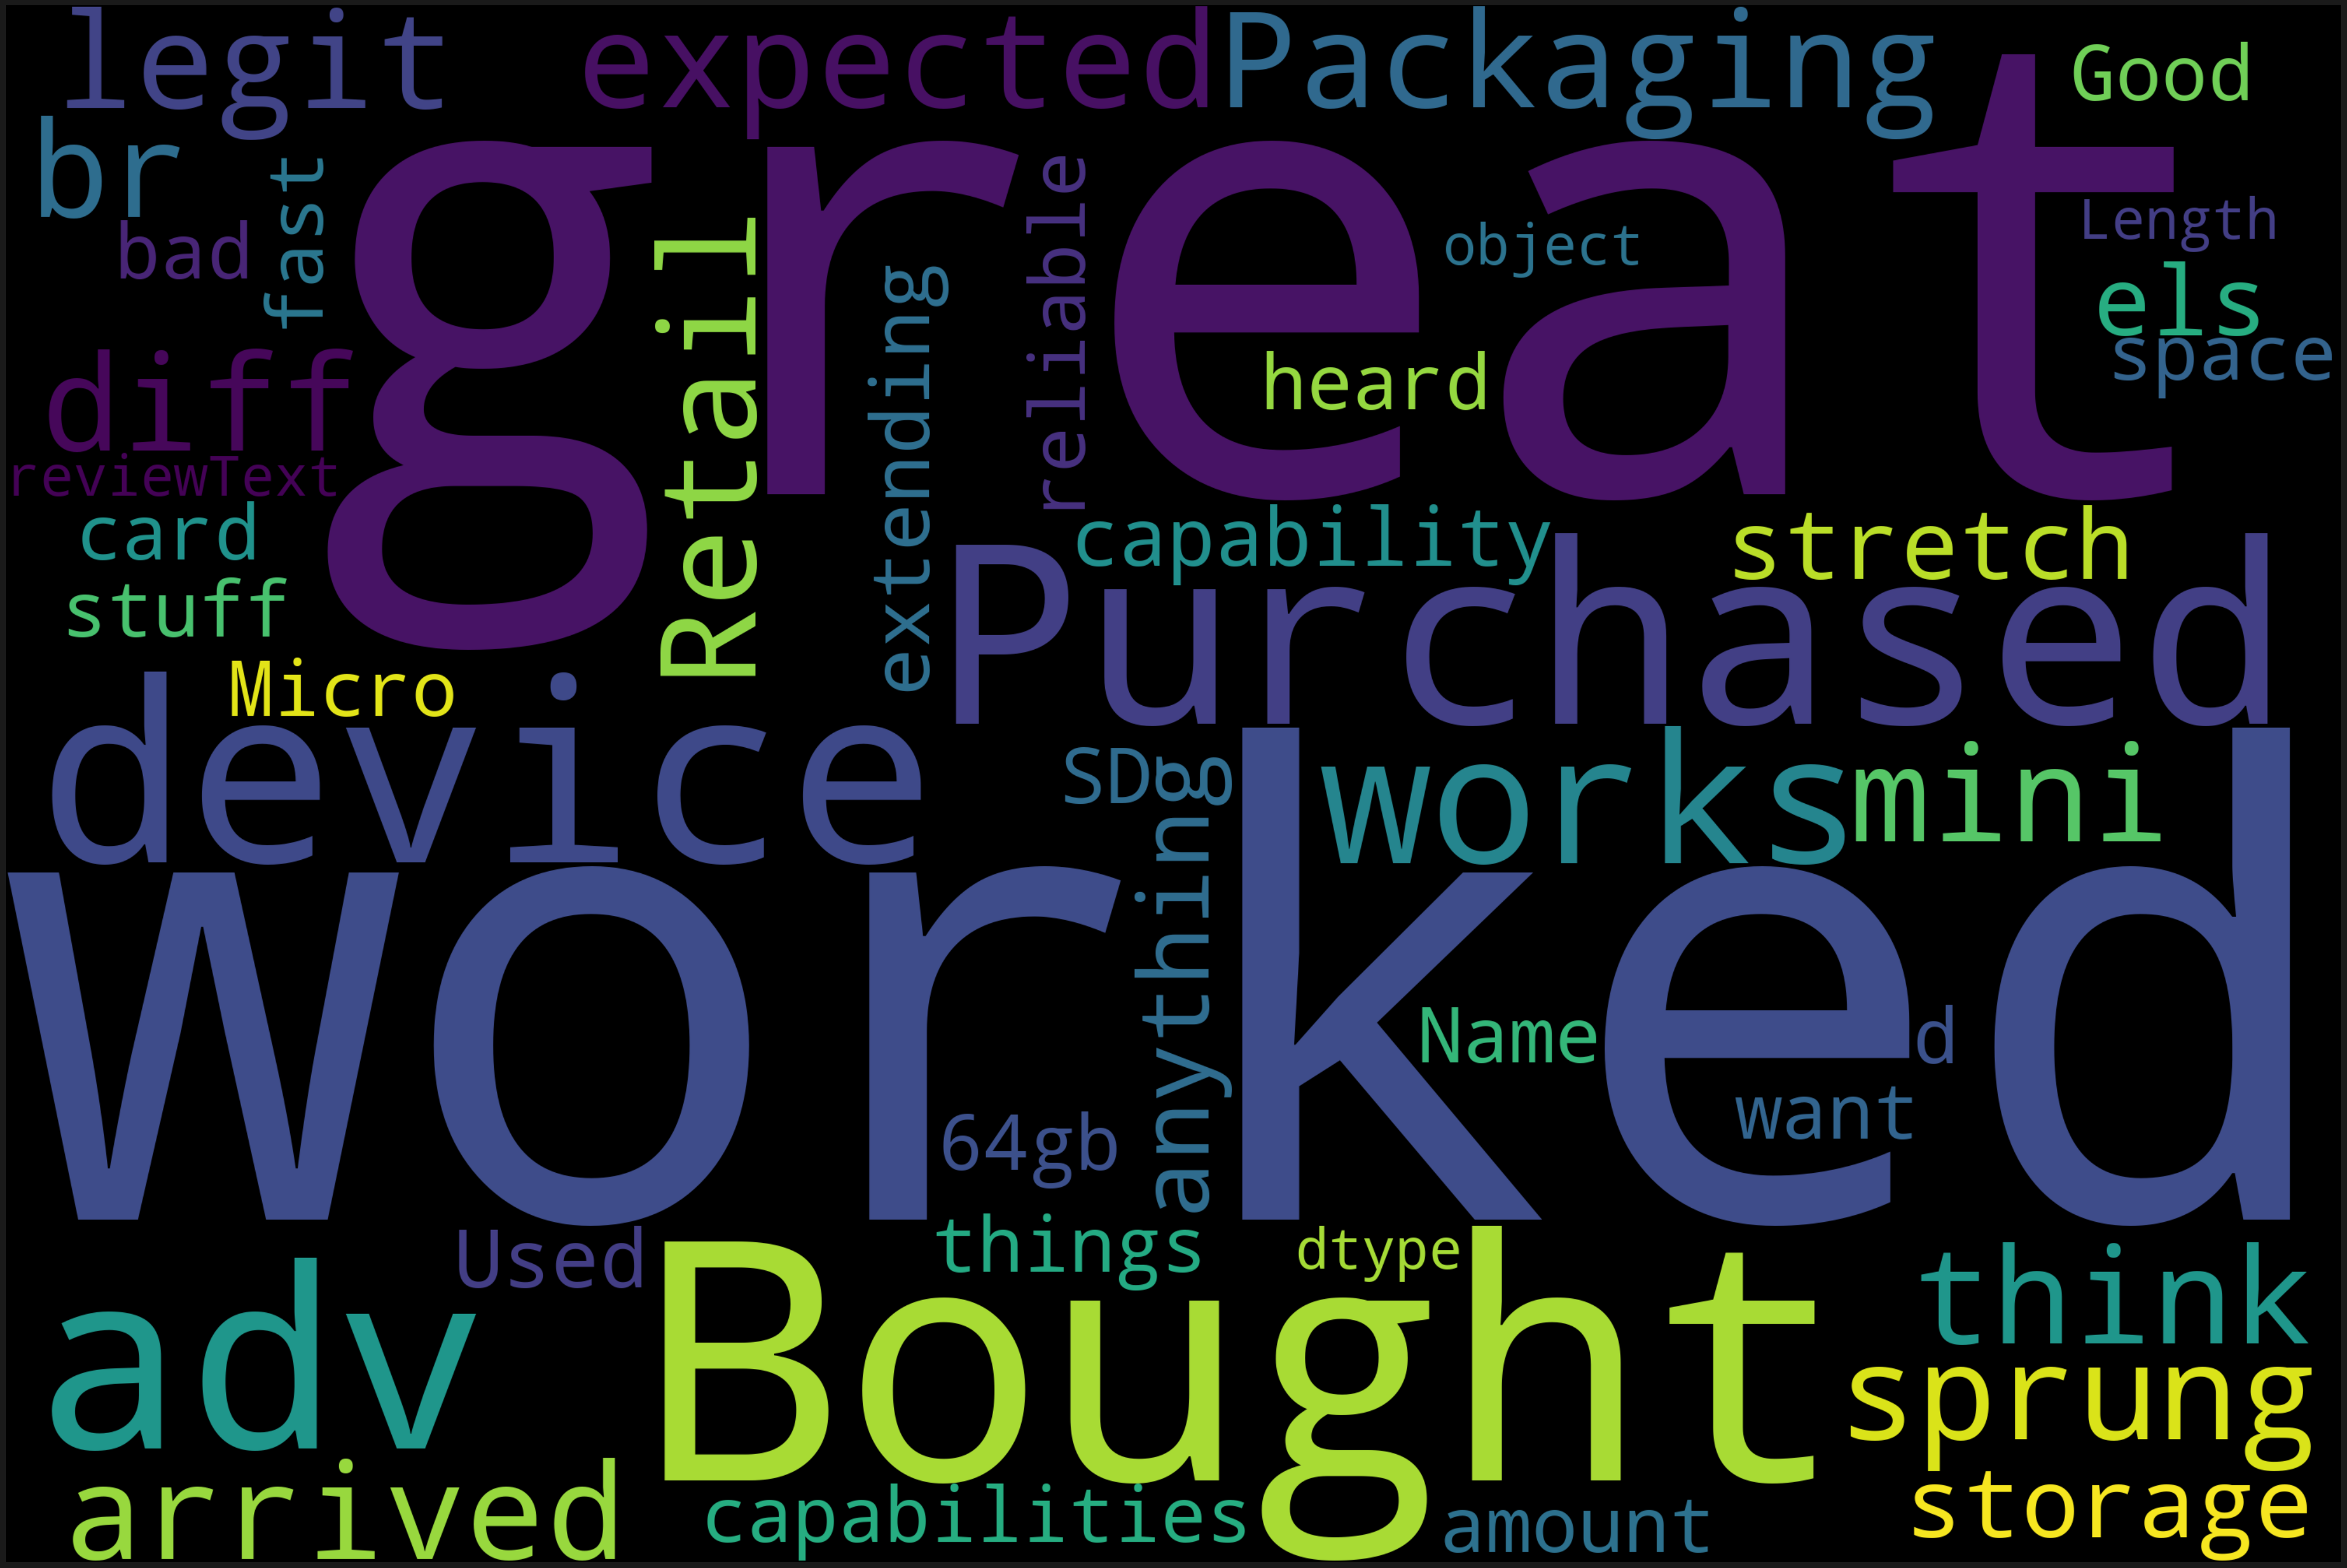

In [22]:
text = positive["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Now, negative 

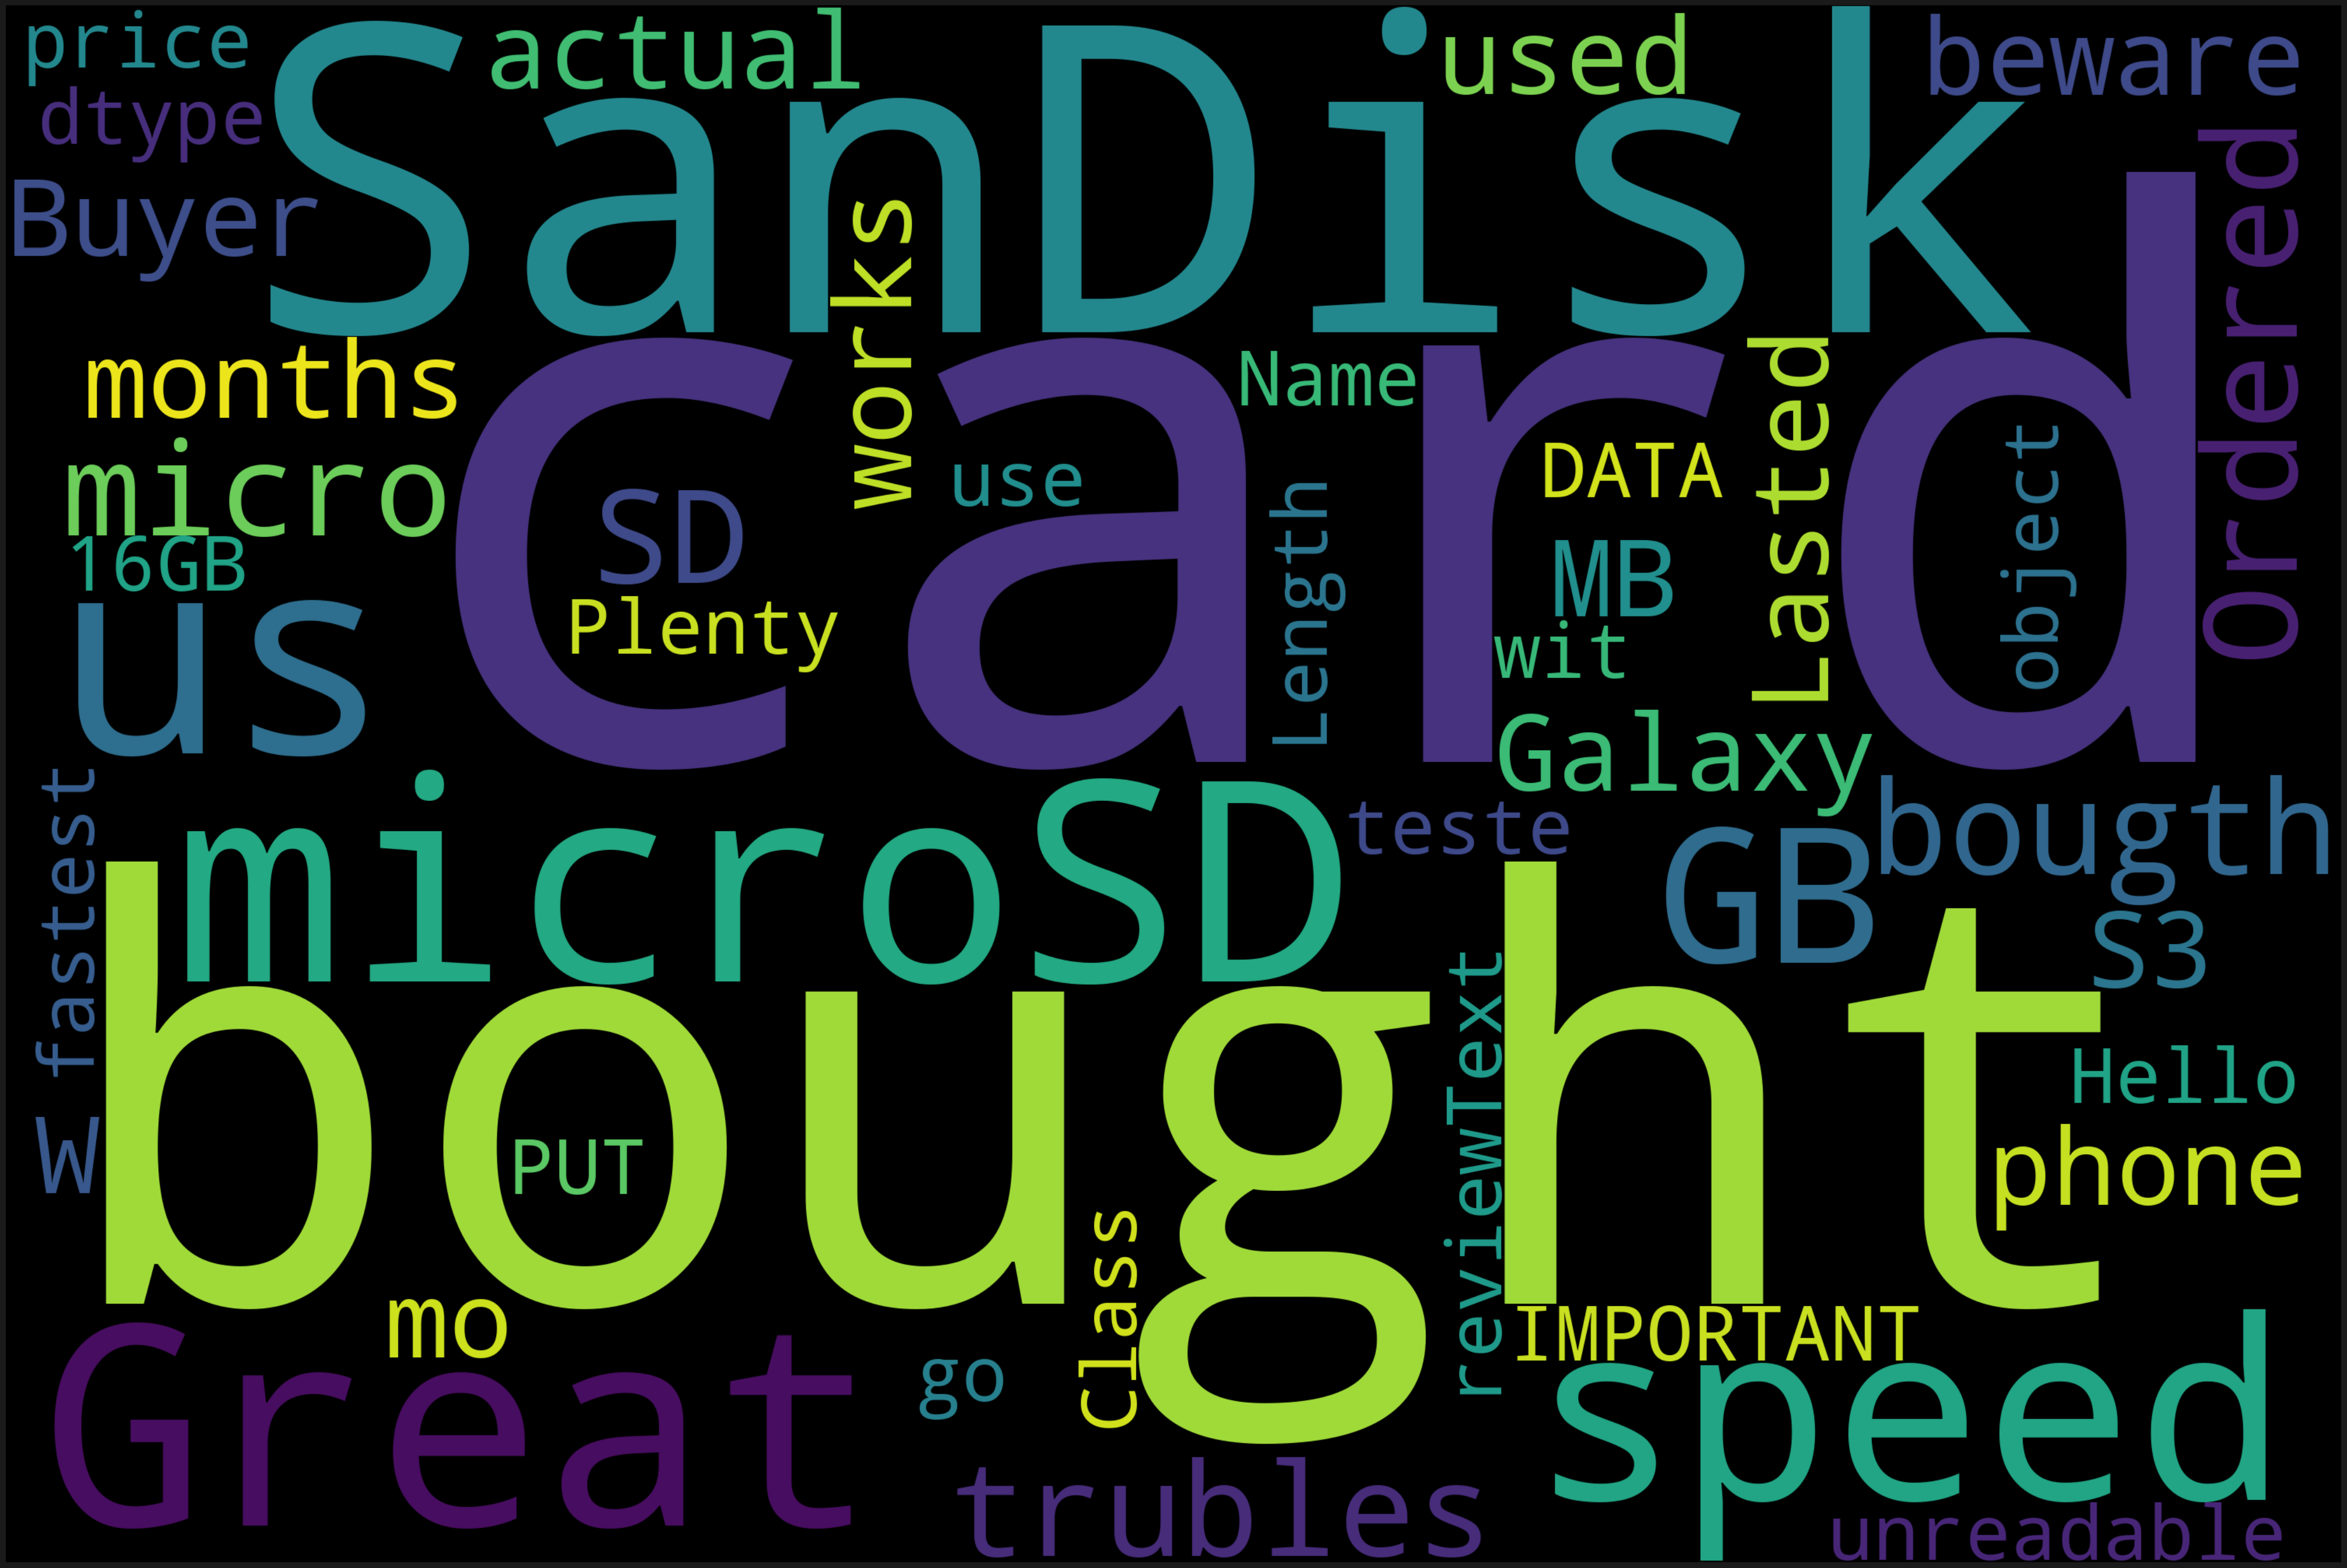

In [23]:
text = negative["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

And good

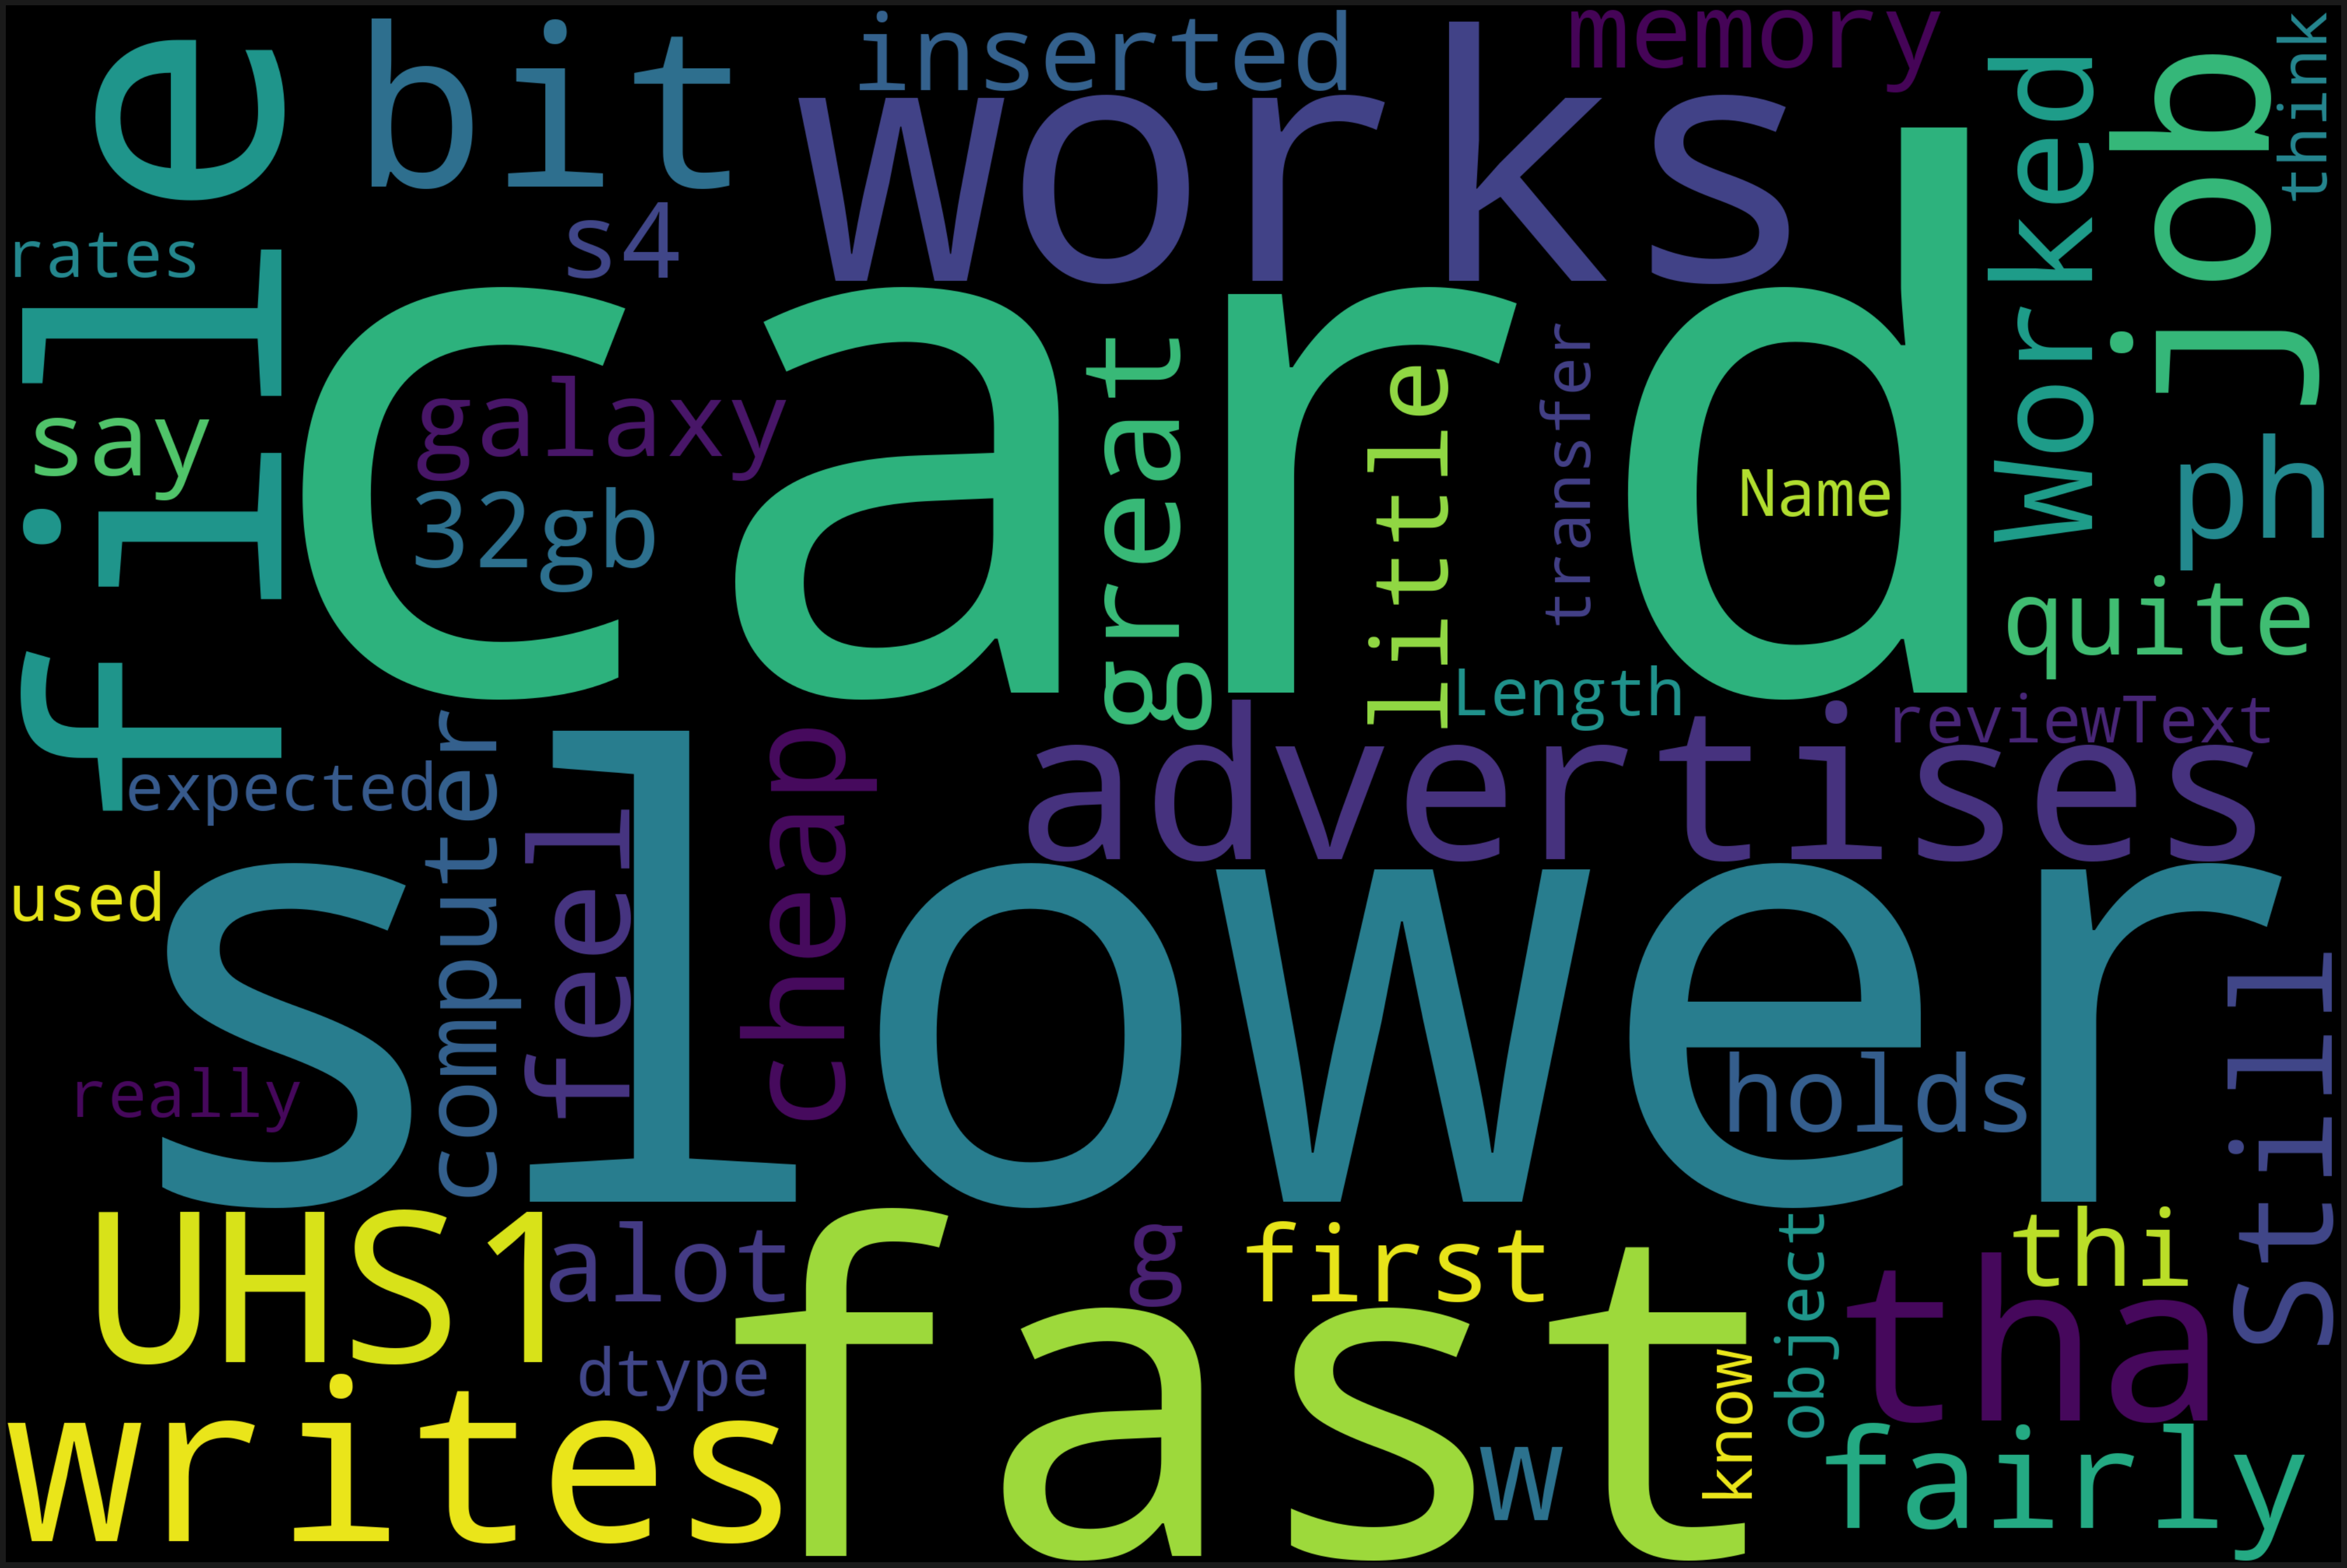

In [24]:
text = good["reviewText"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

 I also decided to check what the common words for each section are: “Positive”,”Good”, and “Negative”.

In [19]:
#Filtering data
positive = df[df["Product_Rating"]=='Positive'].dropna()
good = df[df["Product_Rating"]=='Good'].dropna()
negative = df[df["Product_Rating"]=='Negative'].dropna()

## custom function for ngram generation 
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart 
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## positive reviews 
freq_dict = defaultdict(int)
for sent in positive ["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## good reviews 
freq_dict = defaultdict(int)
for sent in good["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'yellow')

## negative reviews 
freq_dict = defaultdict(int)
for sent in negative["reviewText"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Common words of positive reviews", "Common words of good reviews",
                                          "Common words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Words Plots")
iplot(fig, filename='word-plots')

It's hard to see what the review is about in only one word. I'll try to use 2 word

In [20]:
##  positive reviews 
freq_dict = defaultdict(int)
for sent in positive ["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## good reviews 
freq_dict = defaultdict(int)
for sent in good ["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'yellow')

## negative reviews 
freq_dict = defaultdict(int)
for sent in negative["reviewText"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Positive reviews", 
                                          "Good reviews",
                                          "Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Two words reviw Plots")
iplot(fig, filename='word-plots')


Here I can get a better idea for example "great price" was used 77 and that is what makes this product good versus "stopped working" here we can see that 10 reviews were negative about this product because of that and we can come to the conclusion how to make this product better.But let's also check 3 words


In [21]:
##  positive reviews 
freq_dict = defaultdict(int)
for sent in positive ["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## good reviews 
freq_dict = defaultdict(int)
for sent in good ["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'yellow')

## negative reviews 
freq_dict = defaultdict(int)
for sent in negative["reviewText"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Positive reviews", 
                                          "Good reviews",
                                          "Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Three words reviw Plots")
iplot(fig, filename='word-plots')


Now I can get ever better idea of what product is rewiev about or why the product is good of bad.

# Modeling - TFIDF Vectorization

TF-IDF, or Term Frequency-Inverse Document Frequency, is a method used to assess the significance of words in documents. It involves assigning a weight to each word, indicating its importance in both the document and the entire corpus. Widely utilized in Information Retrieval and Text Mining, this technique involves the consideration of bigrams (two-word combinations) and focuses on the top 5000 words from the reviews.

In [26]:
#review columns
df

Unnamed: 0  reviewerName  overall  \
1              1          0mie      5.0   
2              2           1K3      4.0   
3              3           1m2      5.0   
4              4  2&amp;1/2Men      5.0   
5              5       2Cents!      5.0   
...          ...           ...      ...   
4910        4910        ZM "J"      1.0   
4911        4911            Zo      5.0   
4912        4912     Z S Liske      5.0   
4913        4913      Z Taylor      5.0   
4914        4914           Zza      5.0   

                                             reviewText  reviewTime  day_diff  \
1     Purchased this for my device, it worked as adv...  2013-10-25       409   
2     it works as expected. I should have sprung for...  2012-12-23       715   
3     This think has worked out great.Had a diff. br...  2013-11-21       382   
4     Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
5     It's mini storage.  It doesn't do anything els...  2013-04-29       588   
...                                                 ...         ...       ...   
4910  I bought this Sandisk 16GB Class 10 to use wit...  2013-07-23       503   
4911  Used this for extending the capabilities of my...  2013-08-22       473   
4912  Great card that is very fast and reliable. It ...  2014-03-31       252   
4913  Good amount of space for the stuff I want to d...  2013-09-16       448   
4914  I've heard bad things about this 64gb Micro SD...  2014-02-01       310   

      helpful_yes  helpful_no  total_vote Product_Rating  
1               0           0           0       Positive  
2               0           0           0       Positive  
3               0           0           0       Positive  
4               0           0           0       Positive  
5               0           0           0       Positive  
...           ...         ...         ...            ...  
4910            0           0           0       Negative  
4911            0           0           0       Positive  
4912            0           0           0       Positive  
4913            0           0           0       Positive  
4914            0           0           0       Positive  

[4913 rows x 10 columns]

In [27]:
#drop unnecessary columns
df.drop(['reviewerName','day_diff','total_vote','Unnamed: 0'], axis=1, inplace=True)

In [28]:
#checking again
df

overall                                         reviewText  reviewTime  \
1         5.0  Purchased this for my device, it worked as adv...  2013-10-25   
2         4.0  it works as expected. I should have sprung for...  2012-12-23   
3         5.0  This think has worked out great.Had a diff. br...  2013-11-21   
4         5.0  Bought it with Retail Packaging, arrived legit...  2013-07-13   
5         5.0  It's mini storage.  It doesn't do anything els...  2013-04-29   
...       ...                                                ...         ...   
4910      1.0  I bought this Sandisk 16GB Class 10 to use wit...  2013-07-23   
4911      5.0  Used this for extending the capabilities of my...  2013-08-22   
4912      5.0  Great card that is very fast and reliable. It ...  2014-03-31   
4913      5.0  Good amount of space for the stuff I want to d...  2013-09-16   
4914      5.0  I've heard bad things about this 64gb Micro SD...  2014-02-01   

      helpful_yes  helpful_no Product_Rating  
1               0           0       Positive  
2               0           0       Positive  
3               0           0       Positive  
4               0           0       Positive  
5               0           0       Positive  
...           ...         ...            ...  
4910            0           0       Negative  
4911            0           0       Positive  
4912            0           0       Positive  
4913            0           0       Positive  
4914            0           0       Positive  

[4913 rows x 6 columns]

## Encoding target variable-sentiment
Iwant to encode our target variable with Label encoder.

In [29]:
# calling the label encoder function
label_en = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Product_Rating'. 
df['Product_Rating']= label_en.fit_transform(df['Product_Rating']) 
  
df['Product_Rating'].unique() 

array([2, 0, 1])

In [30]:
df['Product_Rating'].value_counts()

2    4447
1     324
0     142
Name: Product_Rating, dtype: int64

Next, I will apply the Stemming method, which involves deriving the root word from an inflected word. In this step, we will extract the reviews and transform the words within the reviews into their respective root forms.

In [31]:
#Extracting 'reviewText' for processing
features=df.copy()
features=df[['reviewText']].reset_index(drop=True)
features.head()

reviewText
0  Purchased this for my device, it worked as adv...
1  it works as expected. I should have sprung for...
2  This think has worked out great.Had a diff. br...
3  Bought it with Retail Packaging, arrived legit...
4  It's mini storage.  It doesn't do anything els...

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiialeskiv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(features)):
    reviews = re.sub('[^a-zA-Z]', ' ', features['reviewText'][i])
    reviews = reviews.split()
    reviews = [ps.stem(word) for word in reviews if not word in stop_words]
    reviews = ' '.join(reviews)
    corpus.append(reviews)    

In [34]:
corpus[3]

'bought retail packag arriv legit orang envelop english version asian like pictur show arriv quickli bought retail packag htc one sv lg optimu card work order probabl best price get nice sd card'

In [35]:
corpus[10]

'it work file write bit slower expect usb reader also read write faster card insid standard size sd adapt mb vs write mb vs mb read card reader can figur'

Reviewing all the reviews in our dataset 

In [36]:
corpus

['purchas devic work advertis you never much phone memori sinc i download lot stuff brainer',
 'work expect i sprung higher capac i think made bit cheesier earlier version paint look clean',
 'thi think work great had diff bran gb card went south month thi one held pretti well sinc i s note updat i month zero issu sinc transfer s note note thi card reliabl solid cheer',
 'bought retail packag arriv legit orang envelop english version asian like pictur show arriv quickli bought retail packag htc one sv lg optimu card work order probabl best price get nice sd card',
 'it mini storag it anyth els suppos i purchas add addit storag microsoft surfac pro tablet come gb it suppos sandisk long stand reput speak',
 'i phone never skip beat file transfer speedi corrupt issu memori fade issu i would expect sandisk brand great card whi entrust preciou file slightli cheaper piec crap if lose everyth forgiv spend extra coupl buck trust product goe good qa',
 'it hard believ afford digit becom gb devi

Now, as a computer cannot comprehend words and their sentiment, we need to convert these words into numbers. To achieve this encoding, we will utilize TFIDF

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(features['reviewText'])

In [39]:
X.shape

(4913, 5000)

We can be sure we have 5000 columns 

In [40]:
#Getting the target variable
y=df['Product_Rating']

### SMOTE
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. After the oversampling process, the data is reconstructed, and various classification models can be applied to the processed data.

In [41]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 4447, 1: 324, 0: 142})
Resampled dataset shape Counter({2: 4447, 0: 4447, 1: 4447})


Good, as we can see here, the resampled data has equally distributed classes

Next, I want to split the dataset into 80:20 ratio for train and test set respectively.

In [42]:
# Dividing the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

### Model Building
After I have successfully processed the text data, it has transformed into a standard machine learning problem. Next, I am using the sparse matrix, to predict the classes in the target feature

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
This function is responsible for displaying and plotting the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized")
    else:
        print('without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True ')
    plt.xlabel('Prediction')

Initially, I select the best-performing model by applying cross-validation. This involves considering all available classification algorithms and conducting a model selection process to determine which one performs the best.

In [44]:
#creating the objects
LogisticR_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[LogisticR_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9118651996092263
Decision Tree Test Accuracy: 0.8689185832795193
KNN Test Accuracy: 0.9051500173861209
SVC Test Accuracy: 0.9053540973291607
Naive Bayes Test Accuracy: 0.8756399748315202


From the results, we can see logistic regression outdone the rest of the algorithms and all the accuracies from the results are more than 90%. That's great. So let's go with logistic regression with hyperparameter tuning.

### Logistic Regression with Hyperparameter tuning
I'm using the regularization parameter and penalty for parameter tuning, and I'm currently assessing which combination to use.

In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000) 

In [46]:
p_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), p_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy is:",best_model.score(X_test,y_test))

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of S

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/anastasiialeskiv/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

LogisticRegression(C=4714.8663634573895, random_state=0)
The mean accuracy is: 0.9947545897339828


The mean accurancy is 0.99. Next, I am checking Accuracy of logistic regression

In [47]:
LogisticR = LogisticRegression(C=10000.0, random_state=0)
LogisticR.fit(X_train, y_train)
y_pred = LogisticR.predict(X_test)
print('Accuracy of logistic regression: {:.2f}'.format(LogisticR.score(X_test, y_test)))

Accuracy of logistic regression: 0.99


We achieved a high accuracy of 99%, which is good. However, for classification problems, I need to examine the confusion matrix and assess metrics like the F1 score, rather than relying solely on accuracy.

### Classification metrics
Plotting the confusion matrix with ROC and checking f1 score

without normalization


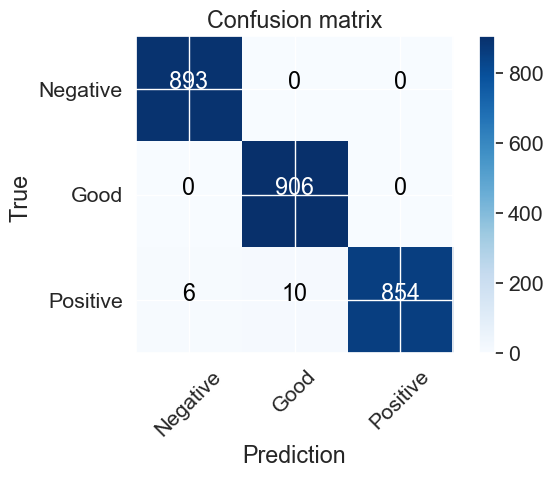

In [48]:
ClassMetrics = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(ClassMetrics, classes=['Negative','Good','Positive'])

See the diagonal elements (893, 906, 854), we observe that they represent correctly predicted records, while the rest correspond to instances that were incorrectly classified by the algorithm. This highlights the importance of evaluating not only accuracy but also other metrics like precision, recall, and the F1 score to gain a comprehensive understanding of the model's performance.

In [49]:
print("Classification Report:\n",classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       893
           1       0.99      1.00      0.99       906
           2       1.00      0.98      0.99       870

    accuracy                           0.99      2669
   macro avg       0.99      0.99      0.99      2669
weighted avg       0.99      0.99      0.99      2669



It's encouraging to see that the model achieved a good F1 score across all classes (positive, negative, and good reviews). This indicates that the model's predictive performance is balanced across the different sentiment categories, which is crucial for a sentiment analysis task where each class holds significance. It suggests that the model is effective in capturing patterns and making accurate predictions for various sentiment labels.

##### ROC-AUC curve
The Receiver Operating Characteristic (ROC) curve is indeed a critical tool, especially when dealing with classification tasks involving multiple classes. It allows us to visualize and assess the model's performance across different classes and provides valuable insights into class-specific classification. By plotting ROC curves for each class, we can determine how well the model discriminates between the different sentiment categories.

The micro and macro averages on the ROC curve are also essential. The micro-average considers all instances individually, regardless of their class labels. It's useful when all classes are of equal importance. The macro-average, on the other hand, calculates the average performance across all classes. This gives you a sense of overall model performance, which is crucial when different classes have varying degrees of importance.

These evaluations and visualizations are fundamental for making informed decisions about the model's performance and tuning its behavior to meet specific objectives.

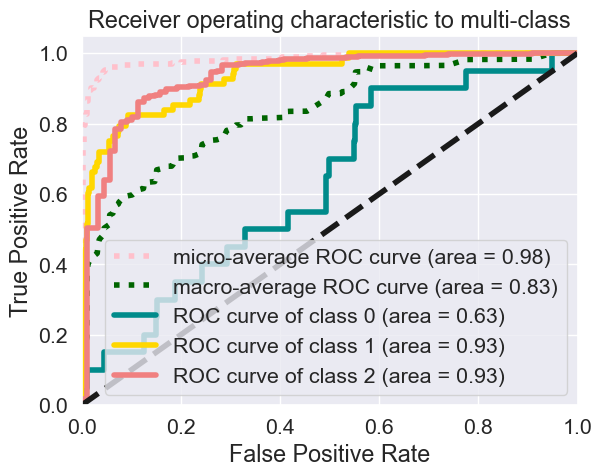

In [50]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='pink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='darkgreen', linestyle=':', linewidth=4)

colors = cycle(['darkcyan', 'gold', 'lightcoral'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

It's great to see that class 2 and class 1 have been classified effectively, as indicated by their high area under the curve (AUC) values. This suggests that the model performs well in distinguishing these classes.

The ROC curve provides a range of threshold values that can be chosen to balance true positive rate (TPR) and false positive rate (FPR) based on the specific requirements of the task.

Micro and Macro Averages:

Micro-average is performing well, indicating an aggregate measure that considers all classes and is beneficial when class imbalance is suspected.

Macro-average computes the metric independently for each class and then takes the average, treating all classes equally. In this case, it appears to have a lower score, suggesting that the model's performance may vary across different classes.

These insights provide a clear understanding of how well the model is performing for different classes and the overall classification task. They help in making informed decisions about the choice of thresholds and understanding the impact of class imbalance on the evaluation metrics.

# Conclusion

N-gram Consideration:

Incorporating n-grams in sentiment analysis is a valuable approach, as it allows the model to capture the meaning of phrases rather than relying solely on individual words. 

Stopwords Handling:

Manually checking and customizing the stopwords list based on the specific requirements of the sentiment analysis task is crucial. In this case, avoiding certain stopwords improved the results. 

Feedback from Good Reviews:

Recognizing that many good reviews were actually criticism or feedback from buyers is a valuable insight. This feedback can be shared with sellers to help them improve their products. Most of the reviews were on electronics such as phones, samsung galaxy, GoPro, cards ets.

Balancing the Dataset:

Achieving a balanced dataset through techniques like SMOTE proved to be beneficial, leading to improved accuracy, precision, recall, and F1 score. Balancing is particularly important for maintaining a fair evaluation of the model's performance. 

Emphasis on F1 Score:

Concentrating on the F1 score in sentiment analysis is highlighted, and achieving an average of 99% demonstrates the effectiveness of the model in both precision and recall. These insights reflect a thoughtful and thorough approach to sentiment analysis, addressing various challenges and considerations in the process.





# Limitation

Sentiment analysis using sentiment word dictionaries has low reliability when the number of positive and negative words is small. For example, if there are 0 positive words and 1 negative word, it is classified as negative. Therefore, if the number of sentiment words is 5 or less, we could exclude the observations.

# Recommendation

My recommendation is to pay attention to good reviews(3 stars reviews) . These are the most helpful and will help manufacturers to make their products better by incorporating customer feedback and suggestions.

# Next Steps

My next step would be to explore 3 stars reviews more to have specific recommendations to my client